<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Frequency-response-of-a-closed-loop-system" data-toc-modified-id="Frequency-response-of-a-closed-loop-system-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Frequency response of a closed loop system</a></span><ul class="toc-item"><li><span><a href="#Controller-Validation:-PI-Velocity-Controller" data-toc-modified-id="Controller-Validation:-PI-Velocity-Controller-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><em>Controller Validation:</em> PI Velocity Controller</a></span></li><li><span><a href="#Creating-a-Sinusoidal-Input-to-your-closed-loop-control-system" data-toc-modified-id="Creating-a-Sinusoidal-Input-to-your-closed-loop-control-system-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creating a Sinusoidal Input to your closed loop control system</a></span></li><li><span><a href="#Collect-Frequency-Response-Data" data-toc-modified-id="Collect-Frequency-Response-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Collect Frequency Response Data</a></span></li></ul></li><li><span><a href="#Digital-Control" data-toc-modified-id="Digital-Control-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Digital Control</a></span><ul class="toc-item"><li><span><a href="#PI-Velocity-Control" data-toc-modified-id="PI-Velocity-Control-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>PI Velocity Control</a></span></li></ul></li></ul></div>

[IMPLEMENTATION RESOURCES](https://sabatind.github.io/ME480_Resources/)

## Frequency response of a closed loop system

All semester you have been considering a system's response to a step input. However, as you are learning in lecture, the input to a system can be continous and you now learning how to use Bode diagrams to predict a system's response to a sinusoidal input.  

While it is possible to [sketch a Bode diagram for a system with a known transfer function](../W12B_FrequencyResponse/W12A_FrequencyResponse.ipynb#How-do-we-characterize-a-system's-response-to-a-sinusoidal-input?), it is often useful to establish the frequency response of a system experimentally in order to either confirm its behavior matches your expectations or to determine its transfer function in cases where other tests are not practical or would not yield enough information.  

To practice obtaining frequency response data experimentally, you will examine the steady state sinusoidal response of a system under closed loop control.  For this experiment you will use the PI controller for angular velocity that you designed and implemented in previous labs to control the benchtop motor-shaft-load system's angular velocity.  


### *Controller Validation:* PI Velocity Controller
You will be using the **MOTOR-RIGID SHAFT-LOAD** configuration that you haved used before.

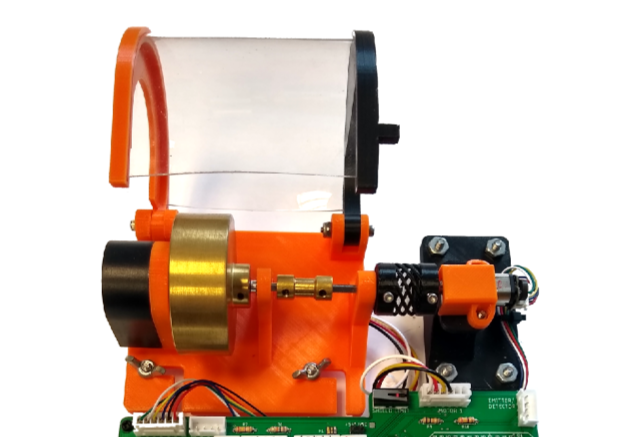

Use the HIGH RESOLUTION encoder that you used in Lab 6 that should be attached to the MOTOR1 Connector.  It has a resolution of 4000 counts/revolution.

You can make use of the angular velocity plant you developed in previous labs to design an angular velocity PI controller.  You will need to design for closed loop behavior with the following characteristics:
* **a settling time of 1.5 to 2 times faster than the open loop plant behavior**
* **damping ratio $\zeta = 0.5$.**  

*If you aren't confident in the plant you constructed in previous labs, take a minute to generate a new one now!  You can revist your code from previous labs  where you designed a PI controller or also take this opportunity to practice by constructing a new one.*

Perform all of the required calculations in the code block below. Use the Angle Deficiency method for your controller design and output the following:
* **Plot** your plant model response along with the actual response as evidence of the **validation of your plant model.**
* **Root locus plot that shows your target eigenvalue location** and that the designed root locus passes throught that point
* **Output** your zero and gain $K$.
* **Output** your calculated controller gains $k_p$, $k_i$, and $k_{sum}$.
* **Plot** an actual step response and compare it to the predicted behavior on the same graph as a **validation of your controller model.**

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

### Creating a Sinusoidal Input to your closed loop control system

To date, you have only applied a step input to the system.  However, with a few modifications your Arduino code can generate a sinusoidal input with adjustable amplitude and frequency.  

<font color='blue'>If you are using code from previous labs, MAKE A COPY and implement the following modifications.</font>

###### <font size = 4> **WITHIN void setup** </font>
```C++
startTime = millis();
```

<font size = 4> **WITHIN void loop** </font>
```C++

//The code below replaces the existing code that calculates your desired velocity.
elapsedTime = (millis()-startTime)/1000.0;
f = 1.0; //Hz.
desiredVelocityAmplitude = 10; //rad/s
desiredVelocity = desiredVelocityAmplitude*sin(f*2*PI*elapsedTime)+shift; 
//set "shift" so the sine wave output is always positive;
```
<font color='blue'>*Ensure you declare any new variables appropriately*</font>

### Collect Frequency Response Data

* Set the amplitude and frequency in the code above to produce a complete sine wave at 1 Hz. You can use the ***serial plotter*** to confirm your signal is correct.  Adjust your Baud rate using the [Serial.begin()](https://www.arduino.cc/reference/en/language/functions/communication/serial/begin/) command to see about 5 cycles at a time.  
* Output the desired velocity and the actual velocity to the ***serial plotter*** and observe the behavior.  If the desired velocity is is not entirely sinusoidal, adjust the amplitude.
* Ensure the output velocity is always positive and never reaches 0 rad/s by adjusting the value of "shift".  *If you are not sure why you want to do this... ask!* 
* By observing the behavior of the output for a range of frequencies using the serial plotter, determine the lower and upper frequency limit outside of which the behavior of the output is "uninteresting". 
* Using ```logspace()```, select a set of frequencies throughout the range of "interesting" behavior you identified.
* Capture the input and output velocity amplitude to perform the frequency analysis in Octave.  Adjust the Baud rate using `Serial.begin()` to plot 5-10 cycles on the plotter. 
* ***Manually*** generate a magnitude ratio Bode plot from this initial data.  
* Continue to record/plot data at different frequencies until the behavior across the entire range is **smoothly represented and easily identifiable.**  Not sure what it should look like... use your controller model to make a prediction!   
* Estimate the natural frequency of the closed loop system from the Bode plot.  If sufficient data has not been recorded to make a reasonable estimate, ***add data where necessary***.

In the code cell below construct the Bode plot of your experimental data.  **On your plot, identify the measured and theoretically predicted closed loop natural frequency.**

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

**Include in the cell below a copy of your completed and properly formatted Arduino code.**

YOUR ANSWER HERE

## Digital Control

The closed loop controllers you have implemented this semester have all been digital controllers.  The Arduinos you are using are one example of a microcontroller which is a small computer that typically perform a single function.


Unlike a controller made from analog electronic amplifiers that essentially respond continuously to changes in the system ([op-amps](https://www.youtube.com/watch?v=bc8YrxqhtJo) are a common example), microcontrollers respond at discrete times.  To date you have been implicitly assuming that the response of the microcontroller is modeled accurately by continuous-time math.  Now you will explore the limitations of that assumption.

### PI Velocity Control

Use the same code you used to validate your PI controller from the first part of this lab  to perform the following experiment.  **Make sure to make a new copy of the file so the original is preserved.**

**To begin, capture the velocity response to a step input and compare it to your model's prediction to confirm your controller is working properly and plot below.**  

Although you did this at the start of the lab, you've made changes since.  This is an important step to confirm the entire system is set up and working as expected!


In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

To assess the impact of the sampling time for the microcontroller:

* Add a [delay](https://www.arduino.cc/reference/en/language/functions/time/delay/) to your loop to increase the time between the samples the controller uses to update the control signal.  Print out the time between loops (sampling time).
* Increase the delay time until you find the ***minimum*** sampling time that causes the closed-loop system response to be unstable.

**Plot the response when the system JUST becomes unstable in the code cell below.**


In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

**Report the sampling time that causes the system to become unstable and describe the instability in the Markdown cell below.**

YOUR ANSWER HERE

Now record the system response to a step input (magnitude is your choice) ***at several sampling times up to the sampling time that causes the system to become unstable.**
* In the Octave cell below, show and label the responses **on a single plot.**  

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

* Using the plot, explain how the system eigenvalues appear to be changing with increasing sample time in the Markdown cell below.

YOUR ANSWER HERE

With the system at the **minimum sample time required to cause instability**, adjust the $k_{sum}$ value until the closed-loop response is stable again, and has a *similar* overshoot to the original design. 
* Plot this response and the continuous system response (no delay) on the same plot in the Matlab cell below.

In [ ]:
% YOUR CODE HERE
error('No Answer Given!')

* Explain the differences in the two responses in the Markdown cell below

YOUR ANSWER HERE